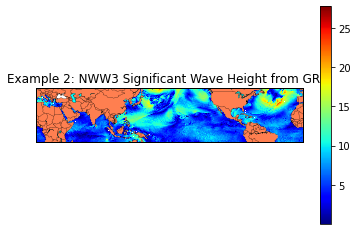

In [27]:
import numpy as np
import pygrib
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
plt.figure()

grib='climate_global.grib2';
grbs=pygrib.open(grib)
print(grbs)
grb = grbs.select(name='Wind speed')[0]
data=grb.values
lat,lon = grb.latlons()

m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon.min(), \
urcrnrlon=lon.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')


#m = Basemap(projection='ortho',lat_0=45,lon_0=-100,resolution='l')

x, y = m(lon,lat)

cs = m.pcolormesh(x,y,data,cmap=plt.cm.jet)

m.drawcoastlines(linewidth=0.25)
m.drawcountries(linewidth=0.25)
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary()
#m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0])
#m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,1])

plt.colorbar(cs,orientation='vertical')
plt.title('Example 2: NWW3 Significant Wave Height from GRiB')
plt.show()

In [10]:
import requests as rq

url = 'https://nomads.ncep.noaa.gov/pub/data/nccf/com/gfs/prod/gfs.20211225/06/wave/gridded/gfswave.t06z.global.0p16.f076.grib2'

content = rq.get(url).content
with open('climate_global.grib2','wb') as file:
    file.write(content)
print('sucess')

sucess


In [9]:
grbs.seek(0)
for grb in grbs:
    print(grb)

1:Wind speed:m s**-1 (instant):polar_stereographic:surface:level 1:fcst time 0 hrs:from 202112250600
2:Wind direction:Degree true (instant):polar_stereographic:surface:level 1:fcst time 0 hrs:from 202112250600
3:U component of wind:m s**-1 (instant):polar_stereographic:surface:level 1:fcst time 0 hrs:from 202112250600
4:V component of wind:m s**-1 (instant):polar_stereographic:surface:level 1:fcst time 0 hrs:from 202112250600
5:Significant height of combined wind waves and swell:m (instant):polar_stereographic:surface:level 1:fcst time 0 hrs:from 202112250600
6:Primary wave mean period:s (instant):polar_stereographic:surface:level 1:fcst time 0 hrs:from 202112250600
7:Primary wave direction:Degree true (instant):polar_stereographic:surface:level 1:fcst time 0 hrs:from 202112250600
8:Significant height of wind waves:m (instant):polar_stereographic:surface:level 1:fcst time 0 hrs:from 202112250600
9:Significant height of swell waves:m (instant):polar_stereographic:orderedSequenceData:lev

##### exemplas basemap: <b> 
https://matplotlib.org/basemap/users/examples.html <br>
</br>

##### site onde é o ideal pegar este tipo de informação é o **OpenDAP**
<br>

###### ex: https://nomads.ncep.noaa.gov/dods/gdas_0p25  <br>

<hr>

<br>

### links de configuração do matplotlib

#### tema de fundo: 

https://matplotlib.org/stable/gallery/style_sheets/dark_background.html <br>
<br>

#### contorno e cor dos continentes: 
https://matplotlib.org/basemap/users/geography.html

https://stackoverflow.com/questions/13397022/fill-countries-in-python-basemap

https://stackoverflow.com/questions/13796315/plot-only-on-continent-in-matplotlib

<br><br>

#### config do basemap 

https://basemaptutorial.readthedocs.io/en/latest/plotting_data.html#hexbin <br> <br>

#### examples Basemap: 

https://matplotlib.org/basemap/users/examples.html

https://basemaptutorial.readthedocs.io/en/latest/plotting_data.html#contour
<br><br>

#### config from colobar
https://stackoverflow.com/questions/25983218/scientific-notation-colorbar-in-matplotlib <br>
https://stackoverflow.com/questions/15908371/matplotlib-colorbars-and-its-text-labels <br>
https://stackoverflow.com/questions/33737427/top-label-for-matplotlib-colorbars <br>

<br><br>

#### config from title
https://stackoverflow.com/questions/33092604/how-to-modify-a-title-matplotlib

<br><br>

#### zoom on basemap ortho projection 
https://stackoverflow.com/questions/47271039/matplotlib-basemap-zoom-into-orthographic-projection
<br><br>

<hr>

#### examples of code python from NOAA

https://polar.ncep.noaa.gov/waves/examples/usingpython.shtml <br>
https://polar.ncep.noaa.gov/waves/examples/usingpython.shtml?text <br>
https://www2.atmos.umd.edu/~cmartin/python/examples/netcdf_example1.html <br>
https://polar.ncep.noaa.gov/global/examples/usingpython.shtml
<br><br>

#### antotations on basemap
https://basemaptutorial.readthedocs.io/en/latest/plotting_data.html <br>
https://stackoverflow.com/questions/35877058/matplotlib-annotate-basemap-in-data-coordinates <br>
https://stackoverflow.com/questions/14643891/different-font-sizes-in-the-same-annotation-of-matplotlib

<br><br>

#### list color
https://matplotlib.org/stable/gallery/color/named_colors.html

<br><br>

#### animated gif
https://stackoverflow.com/questions/41228209/making-gif-from-images-using-imageio-in-python



esses links abaixo foram pegos no seguinte link:
<br>
https://nomads.ncep.noaa.gov/dods/wave/gfswave/20211225<br>
nele pode-se encontra diferentes tipos de data, mas ainda somente relacioando a waves, ondas<br>


este de baixo foi um sucesso, foi o sucesso do trabalho <br>
linkdas informações indenticas ao cara do instagram que se  deram bem no globo por meio do contourf<br>
https://nomads.ncep.noaa.gov/dods/gfs_0p25/gfs20211220/gfs_0p25_06z <br> <br>

o contour, serve bem para continentes, o contourf, para oceanos

In [142]:
import numpy as np
import pygrib
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import xarray as xr
from mpl_toolkits.axes_grid1 import make_axes_locatable


# plt.figure()
# plt.style.use('dark_background')
# hour='06'
# url_cdf=f'https://nomads.ncep.noaa.gov/dods/gfs_0p25/gfs{date}/gfs_0p25_{hour}z'
# file_ex=xr.open_dataset(url_cdf)
# data_cm=file_ex.variables['tmpsig995'][1]-273


def plot_global(date,hour,path:str):
#     ax = plt.gca()
#     divider = make_axes_locatable(ax)
#     cax = divider.append_axes("right", size="2%", pad=0.05)

    hour = f'0{hour}' if len(str(hour))==1 else hour
    print('hour',hour)
    url_cdf=f'https://nomads.ncep.noaa.gov/dods/gfs_0p25/gfs{date}/gfs_0p25_{hour}z'
    import xarray as xr

    # set up the figure
    plt.figure()

    # set up the URL to access the data server.
    # See the NWW3 directory on NOMADS 
    # for the list of available model run dates.

    mydate='20211226'
    url='//nomads.ncep.noaa.gov:9090/dods/wave/nww3/nww3'+ \
        mydate+'/nww3'+mydate+'_00z'

    # Extract the significant wave height of combined wind waves and swell

    file = xr.open_dataset(url_cdf)
    lat  = file.variables['lat'][:]
    lon  = file.variables['lon'][:]
    data = file.variables['tmpsig995'][1]-273
    print(len(data),len(lat))


    m=Basemap(projection='mill',lat_0=-9.41,lon_0=40,lat_ts=10,llcrnrlon=lon.min(), \
      urcrnrlon=lon.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
      resolution='l')
    
    m = Basemap(projection='ortho',lat_0=-9.41,lon_0=-40.5,resolution='c')
    # convert the lat/lon values to x/y projections.
    
    x, y = m(*np.meshgrid(lon,lat))
#     x[x>1e20]=np.nan
#     y[y>1e20]=np.nan
    # plot the field using the fast pcolormesh routine 
    # set the colormap to jet.

    Z = data
    import numpy.ma as ma

    Zm = ma.masked_invalid(Z)
    #m.contour(x,y,data,50,cmap=plt.cm.jet)
    cm=m.contourf(x,y,data,100,shading='nearest',cmap=plt.cm.jet)
    cbar=plt.colorbar(cm,orientation='horizontal',extend='both',fraction=0.07,pad=0.05)
    cbar.set_label('°C',y=0,ha='right')
    cbar.ax.set_title('by: @gpftc_ifsertão')
    temp_cbar=np.linspace(-32,32,8)
    cbar.set_ticks([int(i) for i in temp_cbar])
    #cbar.ax.invert_yaxis()
    #cbar.ax.set_yticklabels(["{:2.2f}".format(i) for i in data_cm]) # add the labels

    # Add a coastline and axis values.
    #print(dir(m))
    m.drawcoastlines()
    #m.drawmapboundary(fill_color='aqua')
    m.drawcountries(linewidth=0.25)
    m.drawcountries(linewidth=0.25)
    #m.fillcontinents(color='coral',lake_color='aqua')
    #m.drawmapboundary(fill_color='aqua')

    m.drawmeridians(np.arange(0,360,30))
    m.drawparallels(np.arange(-90,90,30))
    
    plt.title(f'Surface Temperature \n{hour}:00 UTC 25/12/2021')
    plt.savefig(path,dpi=800)
    plt.show()

hour 06


/home/shady/anaconda3/envs/weather/lib/python3.9/site-packages/xarray/coding/times.py:123: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


721 721


/tmp/ipykernel_33784/1065299064.py:65: UserWarning: The following kwargs were not used by contour: 'shading'
  cm=m.contourf(x,y,data,100,shading='nearest',cmap=plt.cm.jet)


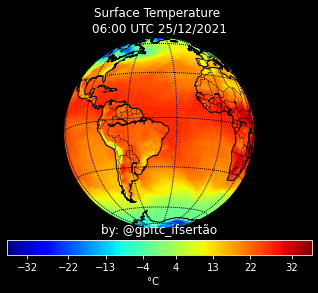

In [143]:
date='20211225'
plot_global(date,6,'wave_arctic.png')

In [80]:
def plot_global_date(date,path_dir):
    hours = ['00','06','12','18']
    path_imgs = []
    for hour in hours:
        path_img = f'{path_dir}/global_{hour}.png'
        plot_global(date,hour,path_img)
        path_imgs.append(path_img)
    return path_imgs
    

hour 00


/home/shady/anaconda3/envs/weather/lib/python3.9/site-packages/xarray/coding/times.py:123: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


721 721


/tmp/ipykernel_33784/2050913206.py:58: UserWarning: The following kwargs were not used by contour: 'shading'
  cm=m.contourf(x,y,data,100,shading='nearest',cmap=plt.cm.jet)


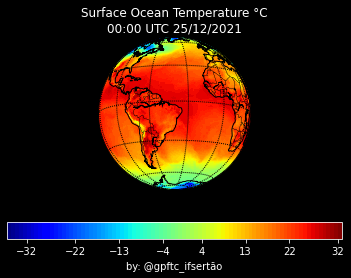

hour 06


/home/shady/anaconda3/envs/weather/lib/python3.9/site-packages/xarray/coding/times.py:123: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


721 721


/tmp/ipykernel_33784/2050913206.py:58: UserWarning: The following kwargs were not used by contour: 'shading'
  cm=m.contourf(x,y,data,100,shading='nearest',cmap=plt.cm.jet)


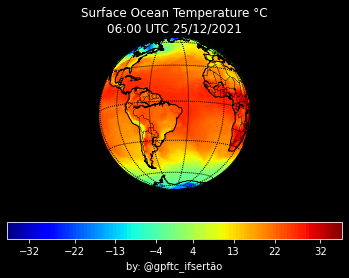

hour 12


/home/shady/anaconda3/envs/weather/lib/python3.9/site-packages/xarray/coding/times.py:123: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


721 721


/tmp/ipykernel_33784/2050913206.py:58: UserWarning: The following kwargs were not used by contour: 'shading'
  cm=m.contourf(x,y,data,100,shading='nearest',cmap=plt.cm.jet)


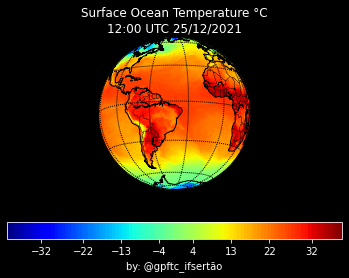

hour 18


/home/shady/anaconda3/envs/weather/lib/python3.9/site-packages/xarray/coding/times.py:123: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


721 721


/tmp/ipykernel_33784/2050913206.py:58: UserWarning: The following kwargs were not used by contour: 'shading'
  cm=m.contourf(x,y,data,100,shading='nearest',cmap=plt.cm.jet)


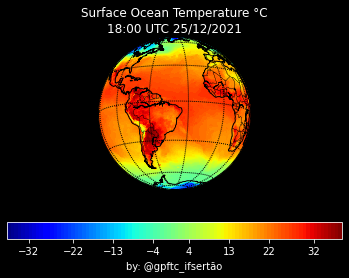

In [81]:
path_dir='img_plots'
date='20211225'
imgs_list=plot_global_date(date,path_dir)

In [82]:
import imageio
imgs=[]
for img in imgs_list:
    imgs.append(imageio.imread(img))
imageio.mimsave('globa.gif',imgs)

In [4]:
"""
plot H's and L's on a sea-level pressure map
(uses scipy.ndimage.filters and netcdf4-python)
"""
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from mpl_toolkits.basemap import Basemap, addcyclic
from scipy.ndimage.filters import minimum_filter, maximum_filter
from netCDF4 import Dataset

def extrema(mat,mode='wrap',window=10):
    """find the indices of local extrema (min and max)
    in the input array."""
    mn = minimum_filter(mat, size=window, mode=mode)
    mx = maximum_filter(mat, size=window, mode=mode)
    # (mat == mx) true if pixel is equal to the local max
    # (mat == mn) true if pixel is equal to the local in
    # Return the indices of the maxima, minima
    return np.nonzero(mat == mn), np.nonzero(mat == mx)

# plot 00 UTC today.
date = datetime.now().strftime('%Y%m%d')+'00'

# open OpenDAP dataset.
#data=Dataset("http://nomads.ncep.noaa.gov:9090/dods/gfs/gfs/%s/gfs_%sz_anl" %\
#        (date[0:8],date[8:10]))
data=Dataset("http://nomads.ncep.noaa.gov:9090/dods/gfs_hd/gfs_hd%s/gfs_hd_%sz"%\
        (date[0:8],date[8:10]))



# read lats,lons.
lats = data.variables['lat'][:]
lons1 = data.variables['lon'][:]
nlats = len(lats)
nlons = len(lons1)
# read prmsl, convert to hPa (mb).
prmsl = 0.01*data.variables['prmslmsl'][0]
# the window parameter controls the number of highs and lows detected.
# (higher value, fewer highs and lows)
local_min, local_max = extrema(prmsl, mode='wrap', window=50)
# create Basemap instance.
m =\
Basemap(llcrnrlon=0,llcrnrlat=-80,urcrnrlon=360,urcrnrlat=80,projection='mill')
# add wrap-around point in longitude.
prmsl, lons = addcyclic(prmsl, lons1)
# contour levels
clevs = np.arange(900,1100.,5.)
# find x,y of map projection grid.
lons, lats = np.meshgrid(lons, lats)
x, y = m(lons, lats)
# create figure.
fig=plt.figure(figsize=(8,4.5))
ax = fig.add_axes([0.05,0.05,0.9,0.85])
cs = m.contour(x,y,prmsl,clevs,colors='k',linewidths=1.)
m.drawcoastlines(linewidth=1.25)
m.fillcontinents(color='0.8')
m.drawparallels(np.arange(-80,81,20),labels=[1,1,0,0])
m.drawmeridians(np.arange(0,360,60),labels=[0,0,0,1])
xlows = x[local_min]; xhighs = x[local_max]
ylows = y[local_min]; yhighs = y[local_max]
lowvals = prmsl[local_min]; highvals = prmsl[local_max]
# plot lows as blue L's, with min pressure value underneath.
xyplotted = []
# don't plot if there is already a L or H within dmin meters.
yoffset = 0.022*(m.ymax-m.ymin)
dmin = yoffset
for x,y,p in zip(xlows, ylows, lowvals):
    if x < m.xmax and x > m.xmin and y < m.ymax and y > m.ymin:
        dist = [np.sqrt((x-x0)**2+(y-y0)**2) for x0,y0 in xyplotted]
        if not dist or min(dist) > dmin:
            plt.text(x,y,'L',fontsize=14,fontweight='bold',
                    ha='center',va='center',color='b')
            plt.text(x,y-yoffset,repr(int(p)),fontsize=9,
                    ha='center',va='top',color='b',
                    bbox = dict(boxstyle="square",ec='None',fc=(1,1,1,0.5)))
            xyplotted.append((x,y))
# plot highs as red H's, with max pressure value underneath.
xyplotted = []
for x,y,p in zip(xhighs, yhighs, highvals):
    if x < m.xmax and x > m.xmin and y < m.ymax and y > m.ymin:
        dist = [np.sqrt((x-x0)**2+(y-y0)**2) for x0,y0 in xyplotted]
        if not dist or min(dist) > dmin:
            plt.text(x,y,'H',fontsize=14,fontweight='bold',
                    ha='center',va='center',color='r')
            plt.text(x,y-yoffset,repr(int(p)),fontsize=9,
                    ha='center',va='top',color='r',
                    bbox = dict(boxstyle="square",ec='None',fc=(1,1,1,0.5)))
            xyplotted.append((x,y))
plt.title('Mean Sea-Level Pressure (with Highs and Lows) %s' % date)
plt.show()

ModuleNotFoundError: No module named 'scipy'

In [254]:
#https://nomads.ncep.noaa.gov/dods/gefs/gefs20211221/gec00_00z_pgrb2b
plt.style.use('dark_background')



def plot_global2(date,hour,path:str):
    hour = f'0{hour}' if len(str(hour))==1 else hour
    print('hour',hour)
    url_cdf=f'https://nomads.ncep.noaa.gov/dods/gfs_0p25/gfs20211222/gfs_0p25_12z'
    import xarray as xr

    # set up the figure
    plt.figure()

    # set up the URL to access the data server.
    # See the NWW3 directory on NOMADS 
    # for the list of available model run dates.

   
    # Extract the significant wave height of combined wind waves and swell

    file = xr.open_dataset(url_cdf)
    lat  = file.variables['lat'][:]
    lon  = file.variables['lon'][:]
    data = file.variables['tmpsfc'][1,:,:]
    print(data)
    data = data -273
    print(data)
    print(len(data),len(lat))


#     m=Basemap(projection='mill',lat_0=10,lon_0=40,lat_ts=10,llcrnrlon=lon.min(), \
#       urcrnrlon=lon.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
#       resolution='l')
    
    m = Basemap(projection='ortho',lat_0=-9.41,lon_0=-40.5,llcrnrx=-6000000, llcrnry=-2000000, urcrnrx=3000000, urcrnry=6000000,resolution='c')
    # convert the lat/lon values to x/y projections.
    x, y = m(*np.meshgrid(lon,lat))
    #x, y = m(lon*180./np.pi, lat*180./np.pi)
   # the fast pcolormesh routine 
    # set the colormap to jet.

    Z = data
    import numpy.ma as ma

    Zm = ma.masked_invalid(Z)
    cm = m.contour(x,y,data,200,linewidths=.5,cmap=plt.cm.inferno)
    #m.contourf(x,y,data,200,cmap=plt.cm.inferno)
    v1 = np.linspace(data.min(), data.max(), 8, endpoint=True)
    #cb = m.colorbar(,pad='5%')

    cbar= plt.colorbar(cm,location='bottom')
    # the mystery step ???????????
    #cbar.ax.set_yticklabels(["{:4.2f}".format(i) for i in v1]) # add the labels

    
    # Add a coastline and axis values.
    #m.etopo()
    m.drawcoastlines(linewidth=.75)
    m.drawcountries(linewidth=0.5)
    #m.drawcontinents(linewidth=0.25)
    m.fillcontinents(color='coral',lake_color='blue')
    m.drawmapboundary(fill_color='navy')

    m.drawmeridians(np.arange(0,360,30),linewidth=.5)
    m.drawparallels(np.arange(-90,90,30),linewidth=.5)

    plt.title('Temperature surface')
    
    xn,yn=m(-40.5,-9.41)
    xn2,yn2=m(-9.52,-40.61)
    plt.annotate('Juazeiro-BA',size=5,xy=(xn,yn),xytext=(xn,yn),xycoords='data',textcoords='data')
    
    plt.scatter(xn,yn,marker='o',c='black')

    plt.savefig(path,dpi=800)
    
    plt.show()

hour 06


/home/shady/anaconda3/envs/weather/lib/python3.9/site-packages/xarray/coding/times.py:123: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


<xarray.Variable (lat: 721, lon: 1440)>
[1038240 values with dtype=float32]
Attributes:
    long_name:  ** surface temperature [k] 
<xarray.Variable (lat: 721, lon: 1440)>
array([[-21.100998, -21.100998, -21.100998, ..., -21.100998, -21.100998,
        -21.100998],
       [-19.800995, -19.800995, -19.800995, ..., -19.800995, -19.800995,
        -19.800995],
       [-18.600998, -18.600998, -18.600998, ..., -18.600998, -18.600998,
        -18.600998],
       ...,
       [-21.901001, -21.901001, -21.901001, ..., -21.901001, -21.901001,
        -21.901001],
       [-21.600998, -21.600998, -21.600998, ..., -21.600998, -21.600998,
        -21.600998],
       [-21.500992, -21.500992, -21.500992, ..., -21.500992, -21.500992,
        -21.500992]], dtype=float32)
721 721


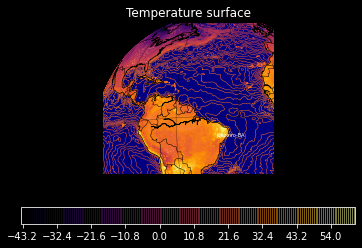

In [255]:
date='20211221'
plot_global2(date,6,'wave_arctic.png')

In [146]:
import xarray as xr 
url_cdf=f'https://nomads.ncep.noaa.gov/dods/gfs_0p25/gfs20211226/gfs_0p25_12z'

file = xr.open_dataset(url_cdf)
lat  = file.variables['lat'][:]
lon  = file.variables['lon'][:]
data = file.variables['tmpsfc']
#print(data)
data = data -273
print(data)
print(len(data),len(lat))

/home/shady/anaconda3/envs/weather/lib/python3.9/site-packages/xarray/coding/times.py:123: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


<xarray.Variable (time: 129, lat: 721, lon: 1440)>
array([[[-19.841644, -19.841644, -19.841644, ..., -19.841644,
         -19.841644, -19.841644],
        [-19.541641, -19.541641, -19.541641, ..., -19.541641,
         -19.541641, -19.541641],
        [-20.44165 , -20.44165 , -20.44165 , ..., -20.44165 ,
         -20.44165 , -20.44165 ],
        ...,
        [-28.141647, -28.141647, -28.141647, ..., -28.141647,
         -28.141647, -28.141647],
        [-27.341644, -27.341644, -27.341644, ..., -27.341644,
         -27.341644, -27.341644],
        [-27.94165 , -27.94165 , -27.94165 , ..., -27.94165 ,
         -27.94165 , -27.94165 ]],

       [[-22.459732, -22.459732, -22.459732, ..., -22.459732,
         -22.459732, -22.459732],
        [-22.059738, -22.059738, -22.059738, ..., -22.059738,
         -22.059738, -22.059738],
        [-22.059738, -22.059738, -22.059738, ..., -22.059738,
         -22.059738, -22.059738],
...
        [-32.199997, -32.199997, -32.199997, ..., -32.199997,
    

In [147]:
dir(data[1])

['T',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__copy__',
 '__dask_graph__',
 '__dask_keys__',
 '__dask_layers__',
 '__dask_optimize__',
 '__dask_postcompute__',
 '__dask_postpersist__',
 '__dask_scheduler__',
 '__dask_tokenize__',
 '__deepcopy__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 

In [148]:
len(data[1][1])
data.max()

<xarray.Variable ()>
array(84.002106, dtype=float32)

In [149]:
temp=[]
temp_max=[]
temp_min=[]
for i in range(120):
    temp_med = (data[i].max()+data[i].min())/2
    temp_max.append(data[i].max())
    temp_min.append(data[i].min())
    temp.append(temp_med)

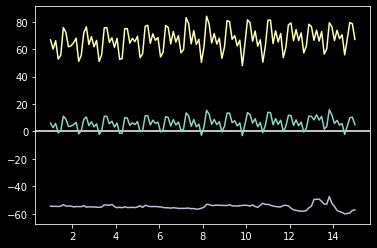

In [150]:
fig, ax = plt.subplots()
#ax.xaxis.grid(True)
ynew = 0
ax.axhline(ynew)

t=np.linspace(1,15,120)
temp=np.array(temp)

tm = np.gradient(temp)

plt.plot(t,temp,label='temp. média')
plt.plot(t,temp_max,label='temp. máx')
plt.plot(t,temp_min,label='temp. min')
#plt.annotate('temp. máx')
#plt.legend(loc='upper center')
#plt.plot(t,tm)
#plt.grid()

In [169]:
import netCDF4 as nt

xr.open_dataset(url_cdf).to_netcdf('dO18Buton.nc')

MemoryError: Unable to allocate 20.5 GiB for an array with shape (129, 41, 721, 1440) and data type float32

In [178]:
def save_netcdf(src_file, trg_file):
    src = nt.Dataset(src_file)
    print('ok src')
    trg = nt.Dataset(trg_file, mode='w')
    print('ok trg')
    # Create the dimensions of the file
    for name, dim in src.dimensions.items():
        trg.createDimension(name, len(dim) if not dim.isunlimited() else None)

    # Copy the global attributes
    trg.setncatts({a:src.getncattr(a) for a in src.ncattrs()})

    # Create the variables in the file
    for name, var in src.variables.items():
        trg.createVariable(name, var.dtype, var.dimensions)

        # Copy the variable attributes
        trg.variables[name].setncatts({a:var.getncattr(a) for a in var.ncattrs()})

        # Copy the variables values (as 'f4' eventually)
        trg.variables[name][:] = src.variables[name][:]

    # Save the file
    trg.close()


In [182]:
save_netcdf(url_noaa,'data.nc')

ok src
ok trg


MemoryError: Unable to allocate 20.5 GiB for an array with shape (129, 41, 721, 1440) and data type float32

In [180]:
url_noaa='https://nomads.ncep.noaa.gov/dods/gfs_0p25/gfs20211226/gfs_0p25_06z'

ntcdf=nt.Dataset(url_noaa)
ntcdf

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format DAP2):
    title: GFS 0.25 deg starting from 06Z26dec2021, downloaded Dec 26 11:11 UTC
    Conventions: COARDS
GrADS
    dataType: Grid
    history: Sun Dec 26 11:44:02 GMT 2021 : imported by GrADS Data Server 2.0
    dimensions(sizes): lat(721), lev(41), lon(1440), time(129)
    variables(dimensions): float64 time(time), float64 lev(lev), float64 lat(lat), float64 lon(lon), float32 absvprs(time, lev, lat, lon), float32 no4lftxsfc(time, lat, lon), float32 acpcpsfc(time, lat, lon), float32 albdosfc(time, lat, lon), float32 apcpsfc(time, lat, lon), float32 capesfc(time, lat, lon), float32 cape180_0mb(time, lat, lon), float32 cape90_0mb(time, lat, lon), float32 cape255_0mb(time, lat, lon), float32 cfrzravesfc(time, lat, lon), float32 cfrzrsfc(time, lat, lon), float32 cicepavesfc(time, lat, lon), float32 cicepsfc(time, lat, lon), float32 cinsfc(time, lat, lon), float32 cin180_0mb(time, lat, lon), float32

In [158]:
ntcdf.variables

{'time': <class 'netCDF4._netCDF4.Variable'>
 float64 time(time)
     grads_dim: t
     grads_mapping: linear
     grads_size: 129
     grads_min: 06z26dec2021
     grads_step: 3hr
     units: days since 1-1-1 00:00:0.0
     long_name: time
     minimum: 06z26dec2021
     maximum: 06z11jan2022
     resolution: 0.125
 unlimited dimensions: 
 current shape = (129,)
 filling off,
 'lev': <class 'netCDF4._netCDF4.Variable'>
 float64 lev(lev)
     grads_dim: z
     grads_mapping: levels
     units: millibar
     long_name: altitude
     minimum: 1000.0
     maximum: 0.01
     resolution: 24.99975
 unlimited dimensions: 
 current shape = (41,)
 filling off,
 'lat': <class 'netCDF4._netCDF4.Variable'>
 float64 lat(lat)
     grads_dim: y
     grads_mapping: linear
     grads_size: 721
     units: degrees_north
     long_name: latitude
     minimum: -90.0
     maximum: 90.0
     resolution: 0.25
 unlimited dimensions: 
 current shape = (721,)
 filling off,
 'lon': <class 'netCDF4._netCDF4.Varia

In [243]:
time = ntcdf.variables['time']
len(time)

print(time)

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    grads_dim: t
    grads_mapping: linear
    grads_size: 129
    grads_min: 00z25dec2021
    grads_step: 3hr
    units: days since 1-1-1 00:00:0.0
    long_name: time
    minimum: 00z25dec2021
    maximum: 00z10jan2022
    resolution: 0.125
unlimited dimensions: 
current shape = (129,)
filling off


In [244]:
ntcdf

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format DAP2):
    title: GFS 0.25 deg starting from 00Z25dec2021, downloaded Dec 25 05:13 UTC
    Conventions: COARDS
GrADS
    dataType: Grid
    history: Sat Dec 25 05:38:03 GMT 2021 : imported by GrADS Data Server 2.0
    dimensions(sizes): lat(721), lev(41), lon(1440), time(129)
    variables(dimensions): float64 time(time), float64 lev(lev), float64 lat(lat), float64 lon(lon), float32 absvprs(time, lev, lat, lon), float32 no4lftxsfc(time, lat, lon), float32 acpcpsfc(time, lat, lon), float32 albdosfc(time, lat, lon), float32 apcpsfc(time, lat, lon), float32 capesfc(time, lat, lon), float32 cape180_0mb(time, lat, lon), float32 cape90_0mb(time, lat, lon), float32 cape255_0mb(time, lat, lon), float32 cfrzravesfc(time, lat, lon), float32 cfrzrsfc(time, lat, lon), float32 cicepavesfc(time, lat, lon), float32 cicepsfc(time, lat, lon), float32 cinsfc(time, lat, lon), float32 cin180_0mb(time, lat, lon), float32

In [160]:
print(ntcdf.variables)

{'time': <class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    grads_dim: t
    grads_mapping: linear
    grads_size: 129
    grads_min: 06z26dec2021
    grads_step: 3hr
    units: days since 1-1-1 00:00:0.0
    long_name: time
    minimum: 06z26dec2021
    maximum: 06z11jan2022
    resolution: 0.125
unlimited dimensions: 
current shape = (129,)
filling off, 'lev': <class 'netCDF4._netCDF4.Variable'>
float64 lev(lev)
    grads_dim: z
    grads_mapping: levels
    units: millibar
    long_name: altitude
    minimum: 1000.0
    maximum: 0.01
    resolution: 24.99975
unlimited dimensions: 
current shape = (41,)
filling off, 'lat': <class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    grads_dim: y
    grads_mapping: linear
    grads_size: 721
    units: degrees_north
    long_name: latitude
    minimum: -90.0
    maximum: 90.0
    resolution: 0.25
unlimited dimensions: 
current shape = (721,)
filling off, 'lon': <class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    grads_dim: x


In [164]:
#ntcdf=nt.Dataset('https://nomads.ncep.noaa.gov/dods/gfs_0p25/gfs20211225/gfs_0p25_00z')
#dir(ntcdf)
ntcdf.filepath='data.nc'
# ntcdf.file_type

AttributeError: NetCDF: Write to read only

In [221]:
xr.open_dataset('https://nomads.ncep.noaa.gov/dods/gfs_0p25/gfs20211225/gfs_0p25_00z')

<xarray.Dataset>
Dimensions:         (time: 129, lev: 41, lat: 721, lon: 1440)
Coordinates:
  * time            (time) datetime64[ns] 2021-12-25 ... 2022-01-10
  * lev             (lev) float64 1e+03 975.0 950.0 925.0 ... 0.04 0.02 0.01
  * lat             (lat) float64 -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
  * lon             (lon) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
Data variables: (12/215)
    absvprs         (time, lev, lat, lon) float32 ...
    no4lftxsfc      (time, lat, lon) float32 ...
    acpcpsfc        (time, lat, lon) float32 ...
    albdosfc        (time, lat, lon) float32 ...
    apcpsfc         (time, lat, lon) float32 ...
    capesfc         (time, lat, lon) float32 ...
    ...              ...
    vwshneg2pv      (time, lat, lon) float32 ...
    vwshtrop        (time, lat, lon) float32 ...
    watrsfc         (time, lat, lon) float32 ...
    weasdsfc        (time, lat, lon) float32 ...
    wiltsfc         (time, lat, lon) float32 ...
    var00212m       (time, lat, lon) float32 ...
Attributes:
    title:        GFS 0.25 deg starting from 00Z25dec2021, downloaded Dec 25 ...
    Conventions:  COARDS\nGrADS
    dataType:     Grid
    history:      Sun Dec 26 10:37:33 UTC 2021 : imported by GrADS Data Serve...